# <span style="color:#4174B9">Baseball Statistics</span>

Baseball statistics play an important role in evaluating a player's and/or team's progress. Since the flow of a baseball game has natural breaks to it, and normally players act individually rather than performing in clusters, the sport lends itself to easy record-keeping and statistics. Statistics have been kept for professional baseball since the creation of the National League and American League, now part of Major League Baseball.

## <span style="color:#0C856D">Analysis of performance metrics</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
%pylab inline
sns.set_style('white')
pd.options.display.max_rows = 8
pd.options.display.max_columns = 15

Populating the interactive namespace from numpy and matplotlib


In [2]:
def read_csv(filename):
    path = './baseballdatabank-master/core/'
    data = pd.read_csv(path + filename, sep=',', keep_default_na=False, na_values=[''])
    print filename, 'has', data.shape[0], 'rows and', data.shape[1], 'columns'
    return data

In [3]:
teams = read_csv('Teams.csv')

Teams.csv has 2805 rows and 48 columns


In [4]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 48 columns):
yearID            2805 non-null int64
lgID              2805 non-null object
teamID            2805 non-null object
franchID          2805 non-null object
divID             1288 non-null object
Rank              2805 non-null int64
G                 2805 non-null int64
Ghome             2406 non-null float64
W                 2805 non-null int64
L                 2805 non-null int64
DivWin            1260 non-null object
WCWin             624 non-null object
LgWin             2777 non-null object
WSWin             2448 non-null object
R                 2805 non-null int64
AB                2805 non-null int64
H                 2805 non-null int64
2B                2805 non-null int64
3B                2805 non-null int64
HR                2805 non-null int64
BB                2805 non-null int64
SO                2685 non-null float64
SB                2661 non-null float64
CS    

In [5]:
salaries = read_csv('Salaries.csv')

Salaries.csv has 25575 rows and 5 columns


In [6]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25575 entries, 0 to 25574
Data columns (total 5 columns):
yearID      25575 non-null int64
teamID      25575 non-null object
lgID        25575 non-null object
playerID    25575 non-null object
salary      25575 non-null int64
dtypes: int64(2), object(3)
memory usage: 999.1+ KB


In [7]:
avg_yearly_salary = salaries.groupby('teamID').mean()['salary']
avg_yearly_wins = teams.groupby('teamID').mean()['W']
wins_vs_salary = pd.concat([avg_yearly_wins, avg_yearly_salary], axis=1)
wins_vs_salary

,W,salary
ALT,6.000000,NaN
ANA,83.000000,1.895109e+06
ARI,79.666667,2.479160e+06
ATL,82.120000,2.206239e+06
...,...,...
WS7,12.000000,NaN
WS8,40.750000,NaN
WS9,44.000000,NaN
WSU,47.000000,NaN


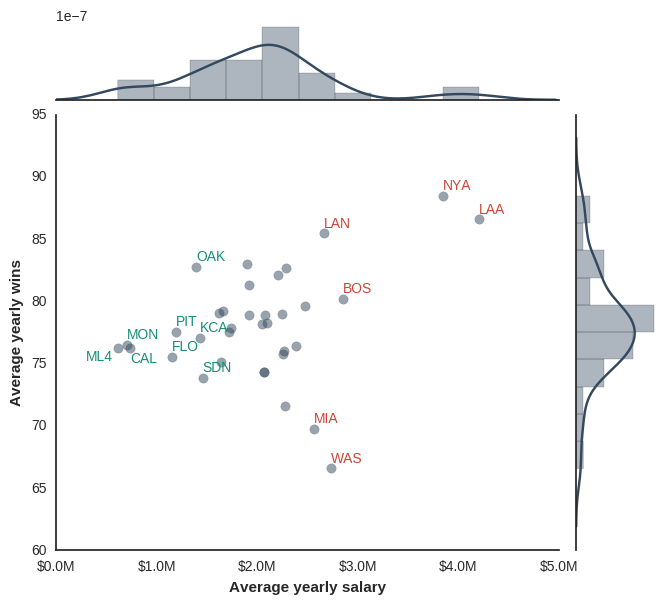

In [8]:
sns.set_style("white")
g = sns.jointplot(data=wins_vs_salary, x='salary', y='W', \
                  stat_func=None, s=45, alpha=0.5, color='#34495e', \
                  marginal_kws=dict(bins=10, kde=True), xlim=(0,5000000))
g.set_axis_labels("Average yearly salary","Average yearly wins", weight='bold')
g.fig.set_size_inches((7,6))

# Format salary labels to make them concise (round off to nearest millions)
def millions(x, pos):
    # The two args are the value and tick position
    return '$%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)
g.ax_marg_x.xaxis.set_major_formatter(formatter)

# Add data labels for top spenderes and least spenders and adjust annotation for overlapping labels
for t, x, y in zip(wins_vs_salary.index, wins_vs_salary.salary, wins_vs_salary.W):
    if x>2500000:
        g.ax_joint.annotate(s=t, xy=(x, y+0.5), color='#CB4335')
    elif t == 'CAL':
        g.ax_joint.annotate(s=t, xy=(x, y-1.2), color='#138D75')
    elif t == 'ML4':
        g.ax_joint.annotate(s=t, xy=(300000, y-1), color='#138D75')
    elif x<1500000:
        g.ax_joint.annotate(s=t, xy=(x, y+0.5), color='#138D75')

In [9]:
batting = read_csv('Batting.csv')
pitching = read_csv('Pitching.csv')
fielding = read_csv('Fielding.csv')

Batting.csv has 101332 rows and 22 columns
Pitching.csv has 44139 rows and 30 columns
Fielding.csv has 170526 rows and 18 columns


In [10]:
# Add salary information to palyer statistics
batting = batting.merge(salaries[['playerID','salary']], on='playerID', how='left')
pitching = pitching.merge(salaries[['playerID','salary']], on='playerID', how='left')
fielding = fielding.merge(salaries[['playerID','salary']], on='playerID', how='left')

In [11]:
def draw_clustermap(df):
    # Remove ordinal columns
    non_ordinal_cols = [col for col in df.columns if col not in ['yearID', 'Rank']]

    # Compute the correlation matrix
    corr = df[non_ordinal_cols].corr()
    
    # Draw a clustermap using correlation as a distance metric
    g = sns.clustermap(corr, cmap='Spectral', linewidths=.5, metric='correlation')
    plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
    plt.show()

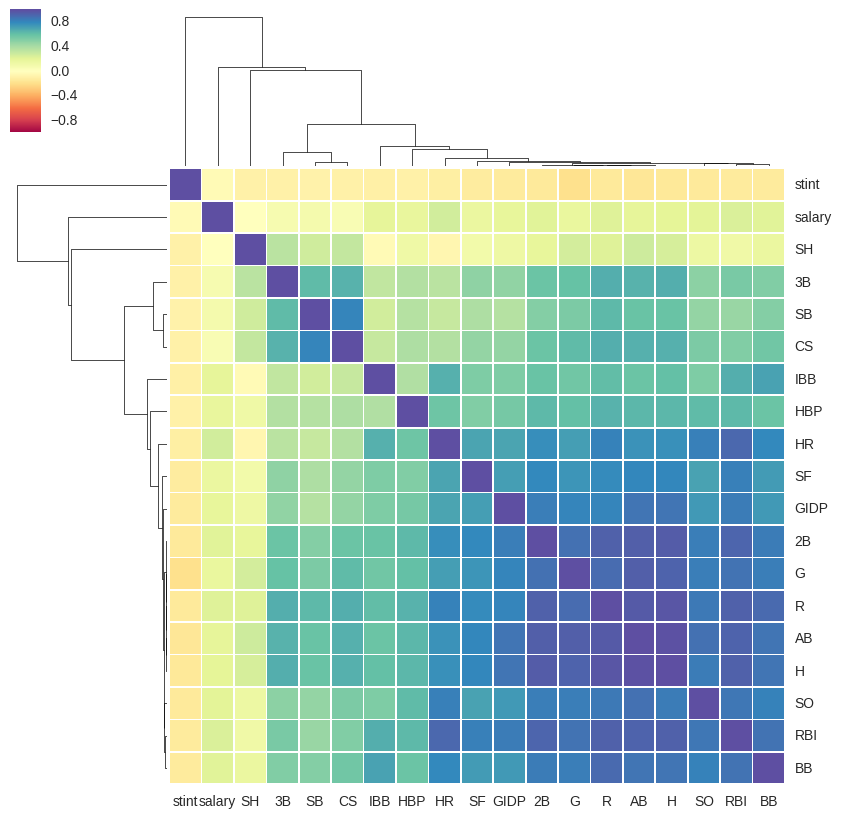

In [12]:
# Correlation clustermap of batting statistics
draw_clustermap(batting)

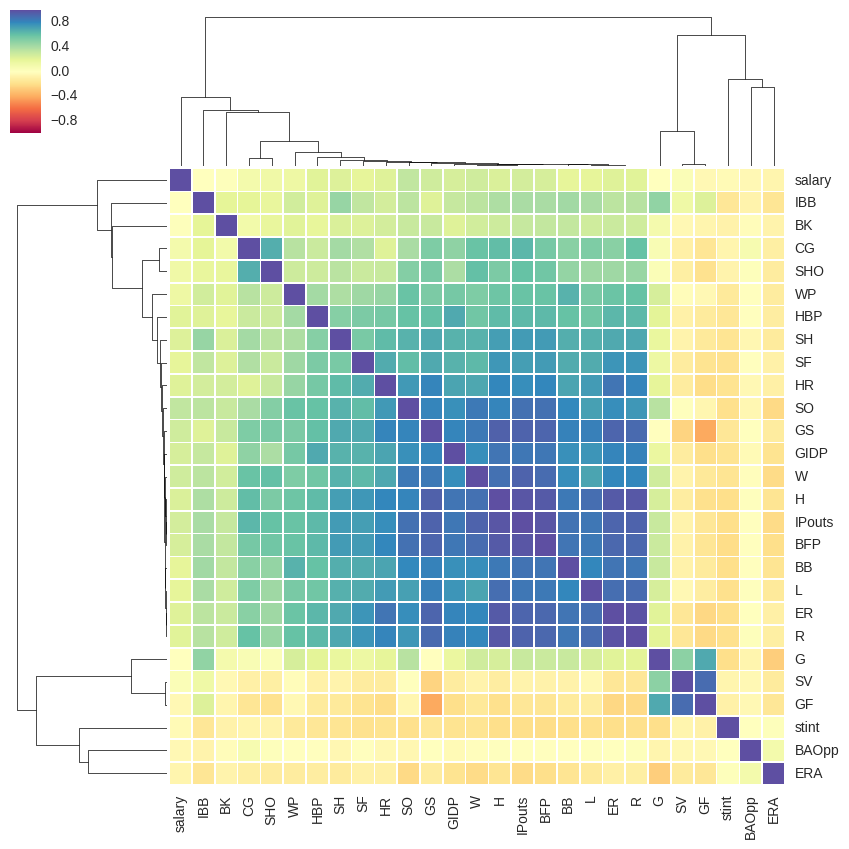

In [13]:
# Correlation clustermap of pitching statistics
draw_clustermap(pitching)

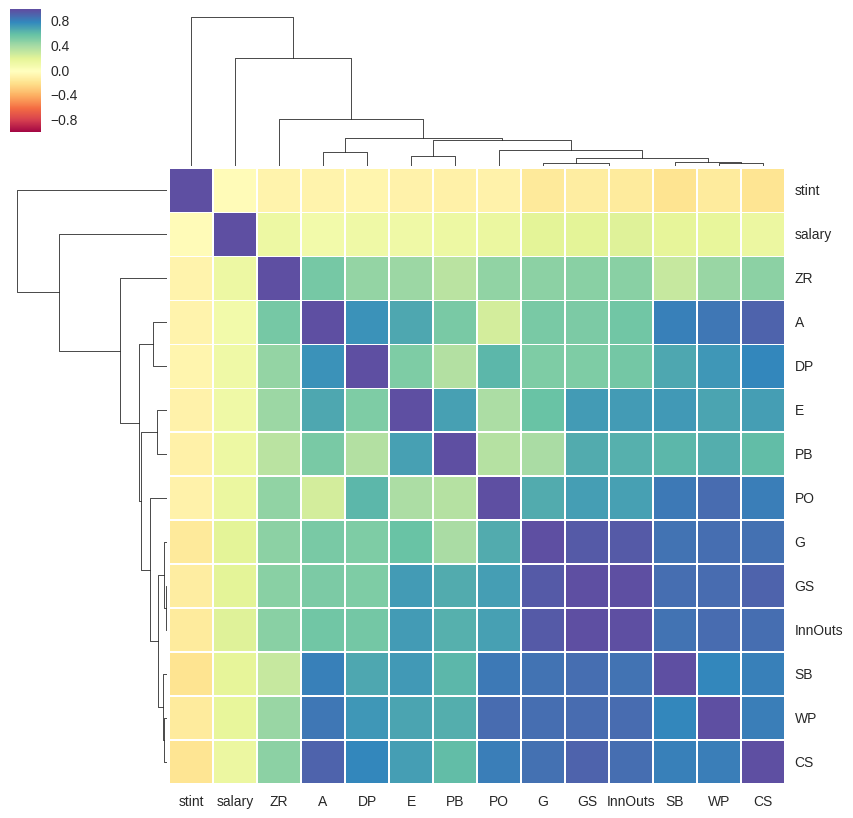

In [14]:
# Correlation clustermap of fielding statistics
draw_clustermap(fielding)